# Slash Data Analysis Task


### Step 1: Exploratory Data Analysis (EDA)


#### 1. Data Inspection:


In [1]:
# import lib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)
pd.set_option('mode.chained_assignment', None)

In [2]:
# read dataset csvfile  load dataset
sal = pd.read_csv('Amazon Sale Report.csv')

G:\anacoda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# show the first few rows
sal.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [4]:
sal.shape

(128975, 24)

In [5]:
# show columns names 
sal.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

### 2-Summary Statistics


In [6]:
sal.info() #128975 Entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [7]:
sal.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


##  Step 2: Data Preprocessing


##### 1-Handling Missing Values:


In [8]:
# show no. of Null Values
sal.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

### 2.1.1 Removing Null Values that not effect and it  represents a small percentane of the data  (not effected)


In [9]:
# Removing Null Values
sal.dropna(subset=['Courier Status','currency','Amount','ship-state', 'ship-postal-code','ship-country','ship-city'],axis = 0,inplace=True)

In [10]:
sal.info() #116016 Entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116016 entries, 1 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               116016 non-null  int64  
 1   Order ID            116016 non-null  object 
 2   Date                116016 non-null  object 
 3   Status              116016 non-null  object 
 4   Fulfilment          116016 non-null  object 
 5   Sales Channel       116016 non-null  object 
 6   ship-service-level  116016 non-null  object 
 7   Style               116016 non-null  object 
 8   SKU                 116016 non-null  object 
 9   Category            116016 non-null  object 
 10  Size                116016 non-null  object 
 11  ASIN                116016 non-null  object 
 12  Courier Status      116016 non-null  object 
 13  Qty                 116016 non-null  int64  
 14  currency            116016 non-null  object 
 15  Amount              116016 non-nul

In [11]:
sal.describe()

,index,Qty,Amount,ship-postal-code
count,116016.000000,116016.000000,116016.000000,116016.000000
mean,64647.436897,1.003775,649.780849,463314.783969
std,37226.107504,0.072651,282.648892,191105.879250
min,1.000000,1.000000,0.000000,110001.000000
25%,32554.500000,1.000000,449.000000,382424.000000
50%,64535.500000,1.000000,606.000000,500032.000000
75%,96827.250000,1.000000,788.000000,600017.000000
max,128974.000000,8.000000,5584.000000,855117.000000


In [12]:
sal.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status            0
Qty                       0
currency                  0
Amount                    0
ship-city                 0
ship-state                0
ship-postal-code          0
ship-country              0
promotion-ids         36558
B2B                       0
fulfilled-by          83621
Unnamed: 22           43921
dtype: int64

### 2.1.2 Droping  all Columns   (not effected)

In [13]:
sal['fulfilled-by'].value_counts()

Easy Ship    32395
Name: fulfilled-by, dtype: int64

In [14]:
sal['fulfilled-by'].unique()

array(['Easy Ship', nan], dtype=object)

In [15]:
sal['Unnamed: 22'].value_counts()


False    72095
Name: Unnamed: 22, dtype: int64

In [16]:
sal['Unnamed: 22'].unique()

array([nan, False], dtype=object)

In [17]:
sal.drop(columns= ['Unnamed: 22', 'fulfilled-by'], inplace = True)

In [18]:
sal.info() #116016 Entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116016 entries, 1 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               116016 non-null  int64  
 1   Order ID            116016 non-null  object 
 2   Date                116016 non-null  object 
 3   Status              116016 non-null  object 
 4   Fulfilment          116016 non-null  object 
 5   Sales Channel       116016 non-null  object 
 6   ship-service-level  116016 non-null  object 
 7   Style               116016 non-null  object 
 8   SKU                 116016 non-null  object 
 9   Category            116016 non-null  object 
 10  Size                116016 non-null  object 
 11  ASIN                116016 non-null  object 
 12  Courier Status      116016 non-null  object 
 13  Qty                 116016 non-null  int64  
 14  currency            116016 non-null  object 
 15  Amount              116016 non-nul

In [19]:
sal.describe()

,index,Qty,Amount,ship-postal-code
count,116016.000000,116016.000000,116016.000000,116016.000000
mean,64647.436897,1.003775,649.780849,463314.783969
std,37226.107504,0.072651,282.648892,191105.879250
min,1.000000,1.000000,0.000000,110001.000000
25%,32554.500000,1.000000,449.000000,382424.000000
50%,64535.500000,1.000000,606.000000,500032.000000
75%,96827.250000,1.000000,788.000000,600017.000000
max,128974.000000,8.000000,5584.000000,855117.000000


In [20]:
sal.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status            0
Qty                       0
currency                  0
Amount                    0
ship-city                 0
ship-state                0
ship-postal-code          0
ship-country              0
promotion-ids         36558
B2B                       0
dtype: int64

### 2.1.3  Filling NaN Values for    promotion-ids if  have promo get id if not no promo


In [21]:
sal['promotion-ids'].value_counts()

IN Core Free Shipping 2015/04/08 23-48-5-108                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [22]:
sal['promotion-ids'].unique()

array(['Amazon PLCC Free-Financing Universal Merchant AAT-WNKTBO3K27EJC,Amazon PLCC Free-Financing Universal Merchant AAT-QX3UCCJESKPA2,Amazon PLCC Free-Financing Universal Merchant AAT-5QQ7BIYYQEDN2,Amazon PLCC Free-Financing Universal Merchant AAT-DSJ2QRXXWXVMQ,Amazon PLCC Free-Financing Universal Merchant AAT-CXJHMC2YJUK76,Amazon PLCC Free-Financing Universal Merchant AAT-CC4FAVTYR4X7C,Amazon PLCC Free-Financing Universal Merchant AAT-XXRCW6NZEPZI4,Amazon PLCC Free-Financing Universal Merchant AAT-CXNSLNBROFDW4,Amazon PLCC Free-Financing Universal Merchant AAT-R7GXNZWISTRFA,Amazon PLCC Free-Financing Universal Merchant AAT-WSJLDN3X7KEMO,Amazon PLCC Free-Financing Universal Merchant AAT-VL6FGQVGQVXUS,Amazon PLCC Free-Financing Universal Merchant AAT-EOKPWFWYW7Y6I,Amazon PLCC Free-Financing Universal Merchant AAT-ZYL5UPUNW6T62,Amazon PLCC Free-Financing Universal Merchant AAT-XVPICCHRWDCAI,Amazon PLCC Free-Financing Universal Merchant AAT-ETXQ3XXWMRXBG,Amazon PLCC Free-Financing Unive

In [23]:
sal['promotion-ids'].fillna('no promotion',inplace=True)

In [24]:
sal.info() #116016 Entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116016 entries, 1 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               116016 non-null  int64  
 1   Order ID            116016 non-null  object 
 2   Date                116016 non-null  object 
 3   Status              116016 non-null  object 
 4   Fulfilment          116016 non-null  object 
 5   Sales Channel       116016 non-null  object 
 6   ship-service-level  116016 non-null  object 
 7   Style               116016 non-null  object 
 8   SKU                 116016 non-null  object 
 9   Category            116016 non-null  object 
 10  Size                116016 non-null  object 
 11  ASIN                116016 non-null  object 
 12  Courier Status      116016 non-null  object 
 13  Qty                 116016 non-null  int64  
 14  currency            116016 non-null  object 
 15  Amount              116016 non-nul

In [25]:
sal.describe()

,index,Qty,Amount,ship-postal-code
count,116016.000000,116016.000000,116016.000000,116016.000000
mean,64647.436897,1.003775,649.780849,463314.783969
std,37226.107504,0.072651,282.648892,191105.879250
min,1.000000,1.000000,0.000000,110001.000000
25%,32554.500000,1.000000,449.000000,382424.000000
50%,64535.500000,1.000000,606.000000,500032.000000
75%,96827.250000,1.000000,788.000000,600017.000000
max,128974.000000,8.000000,5584.000000,855117.000000


In [26]:
sal.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
dtype: int64

###  2. Data Type Conversion:


In [27]:
sal.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,Shipped,1,INR,574.0,CHENNAI,TAMIL NADU,600073.0,IN,no promotion,False
5,5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,...,Shipped,1,INR,824.0,GHAZIABAD,UTTAR PRADESH,201102.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
6,6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,...,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,160036.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False


In [28]:
# Convert B2B column values to business and customer

sal['B2B'].replace(to_replace=[True,False],value=['business','customer'], inplace=True)

In [29]:
sal.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,customer
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,business
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,Shipped,1,INR,574.0,CHENNAI,TAMIL NADU,600073.0,IN,no promotion,customer
5,5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,...,Shipped,1,INR,824.0,GHAZIABAD,UTTAR PRADESH,201102.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,customer
6,6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,...,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,160036.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,customer


In [30]:
#  converting Date column to datetime format
sal['Date'] = pd.to_datetime(sal['Date'])

In [31]:
sal.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,customer
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,business
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,Shipped,1,INR,574.0,CHENNAI,TAMIL NADU,600073.0,IN,no promotion,customer
5,5,404-1490984-4578765,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,...,Shipped,1,INR,824.0,GHAZIABAD,UTTAR PRADESH,201102.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,customer
6,6,408-5748499-6859555,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,...,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,160036.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,customer


###  3. Outlier Detection and Treatment:


In [32]:
sal.describe()

,index,Qty,Amount,ship-postal-code
count,116016.000000,116016.000000,116016.000000,116016.000000
mean,64647.436897,1.003775,649.780849,463314.783969
std,37226.107504,0.072651,282.648892,191105.879250
min,1.000000,1.000000,0.000000,110001.000000
25%,32554.500000,1.000000,449.000000,382424.000000
50%,64535.500000,1.000000,606.000000,500032.000000
75%,96827.250000,1.000000,788.000000,600017.000000
max,128974.000000,8.000000,5584.000000,855117.000000


In [33]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116016 entries, 1 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               116016 non-null  int64         
 1   Order ID            116016 non-null  object        
 2   Date                116016 non-null  datetime64[ns]
 3   Status              116016 non-null  object        
 4   Fulfilment          116016 non-null  object        
 5   Sales Channel       116016 non-null  object        
 6   ship-service-level  116016 non-null  object        
 7   Style               116016 non-null  object        
 8   SKU                 116016 non-null  object        
 9   Category            116016 non-null  object        
 10  Size                116016 non-null  object        
 11  ASIN                116016 non-null  object        
 12  Courier Status      116016 non-null  object        
 13  Qty                 116016 no

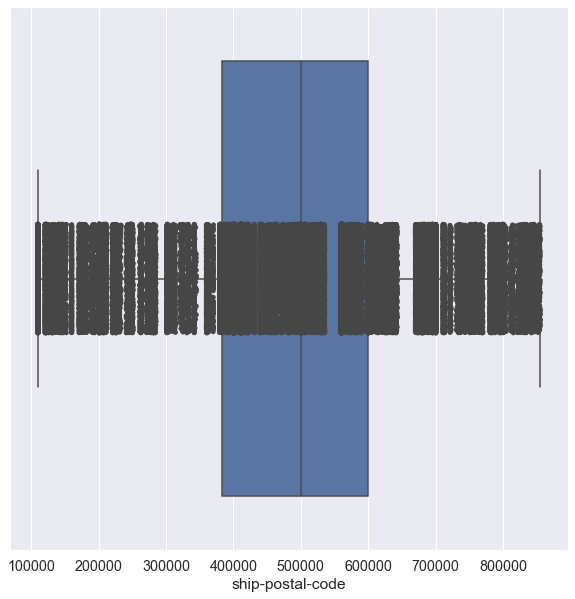

In [34]:
sns.boxplot(x='ship-postal-code', data=sal)
sns.stripplot(x='ship-postal-code', data=sal, color="#474646")

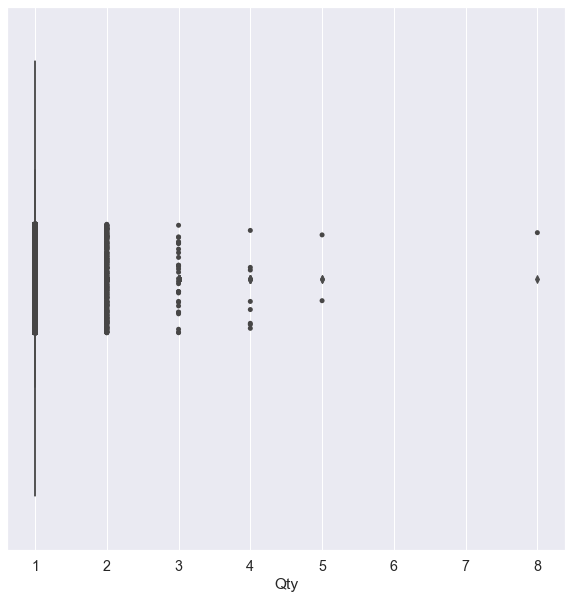

In [35]:
sns.boxplot(x='Qty', data=sal)
sns.stripplot(x='Qty', data=sal, color="#474646")

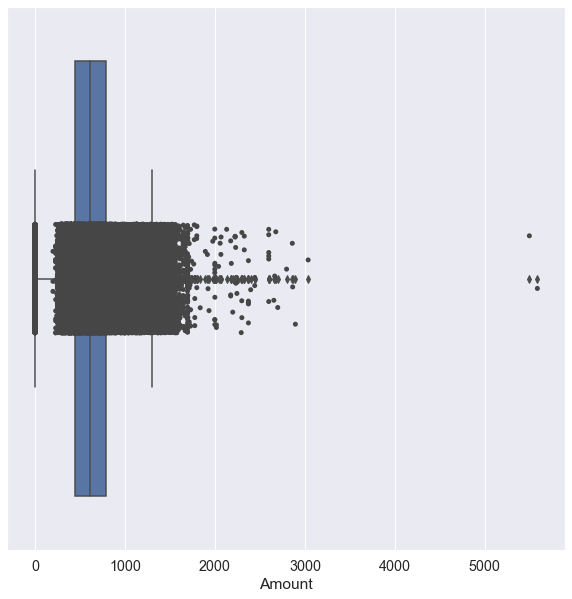

In [36]:
sns.boxplot(x='Amount', data=sal)
sns.stripplot(x='Amount', data=sal, color="#474646")

In [37]:
# z socre method
#Calculate the z-score for each data point in the 'sales' column
sal['z_score'] = np.abs((sal['Amount'] - sal['Amount'].mean()) / sal['Amount'].std())

In [38]:
# Set a threshold for outlier detection (for ex  z-score > 3)
threshold = 3


In [39]:
# Identify outliers based on the threshold
outliers = sal[sal['z_score'] > threshold]

In [40]:
# Replace outliers with the median value of the 'sales' column
median_sales= sal['Amount'].median()
sal.loc[sal['z_score'] > threshold, 'Amount'] = median_sales

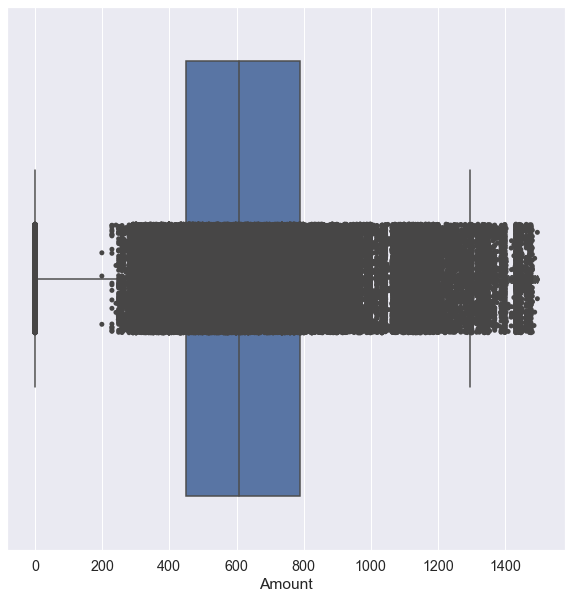

In [41]:
# after treat outier 
sns.boxplot(x='Amount', data=sal)
sns.stripplot(x='Amount', data=sal, color="#474646")

In [42]:
#Calculate the z-score for each data point in the 'sales' column
sal['z_score'] = np.abs((sal['Qty'] - sal['Qty'].mean()) / sal['Qty'].std())

In [43]:
# Set a threshold for outlier detection 
threshold = 3

In [44]:
# Identify outliers based on the threshold
outliers = sal[sal['z_score'] > threshold]

In [45]:
# Replace outliers with the median value of the 'sales' column
median_sales= sal['Qty'].median()
sal.loc[sal['z_score'] > threshold, 'Qty'] = median_sales

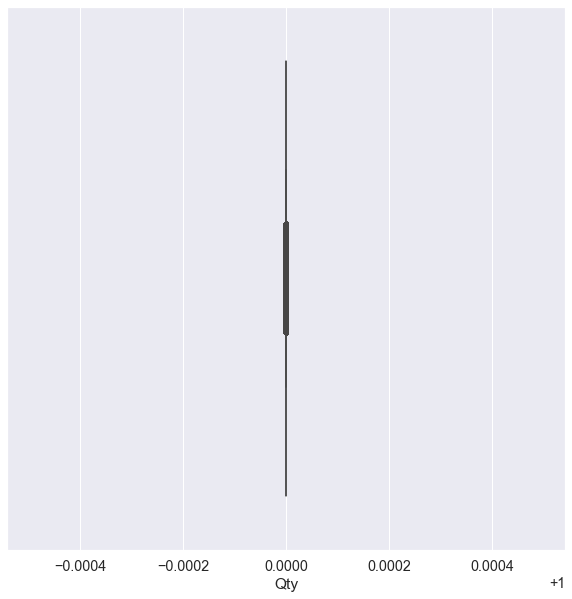

In [46]:
# after treat outlier 
sns.boxplot(x='Qty', data=sal)
sns.stripplot(x='Qty', data=sal, color="#474646")

## Step 3: Data Visualization


In [47]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116016 entries, 1 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               116016 non-null  int64         
 1   Order ID            116016 non-null  object        
 2   Date                116016 non-null  datetime64[ns]
 3   Status              116016 non-null  object        
 4   Fulfilment          116016 non-null  object        
 5   Sales Channel       116016 non-null  object        
 6   ship-service-level  116016 non-null  object        
 7   Style               116016 non-null  object        
 8   SKU                 116016 non-null  object        
 9   Category            116016 non-null  object        
 10  Size                116016 non-null  object        
 11  ASIN                116016 non-null  object        
 12  Courier Status      116016 non-null  object        
 13  Qty                 116016 no

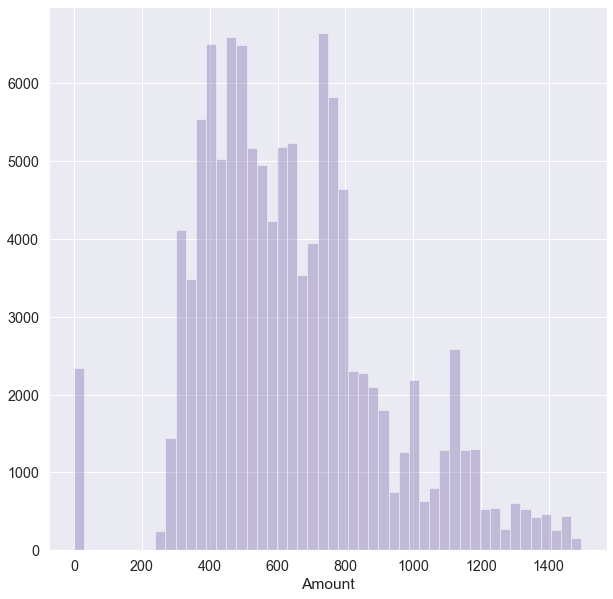

In [48]:
sns.distplot(sal['Amount'], kde=False, color='m')

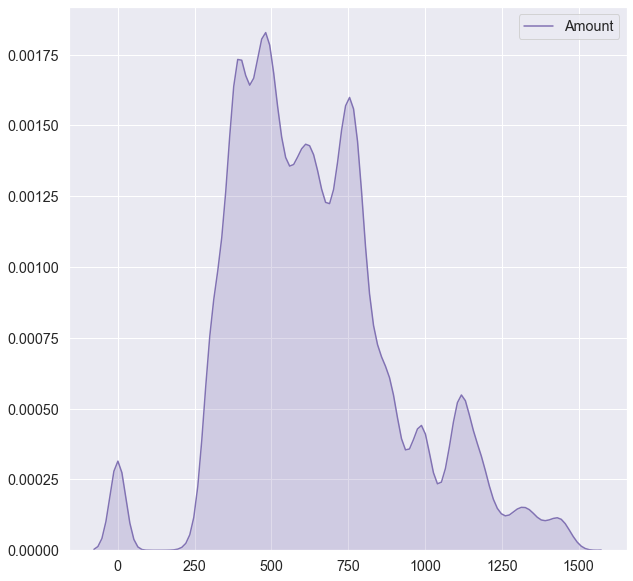

In [49]:
sns.kdeplot(sal['Amount'], shade=True, color='m')

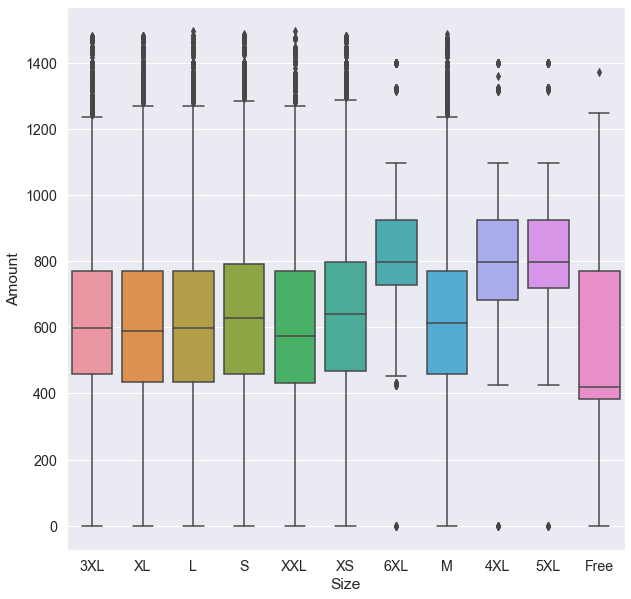

In [50]:
sns.boxplot(x="Size", y="Amount", data=sal)

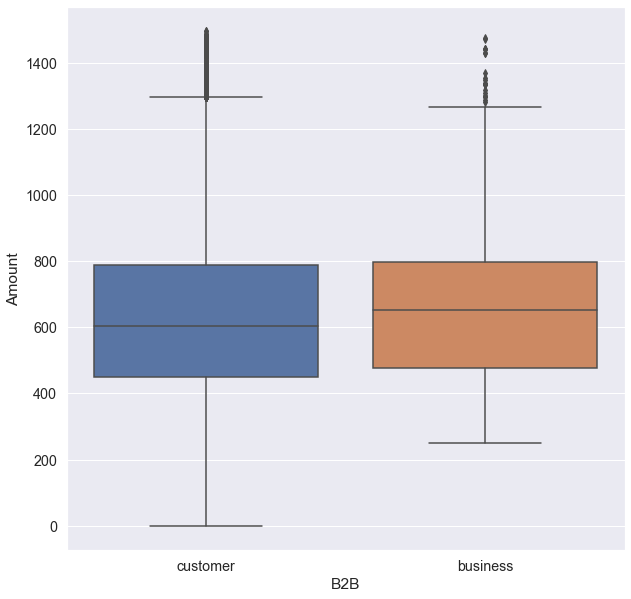

In [51]:
sns.boxplot(x="B2B", y="Amount", data=sal)

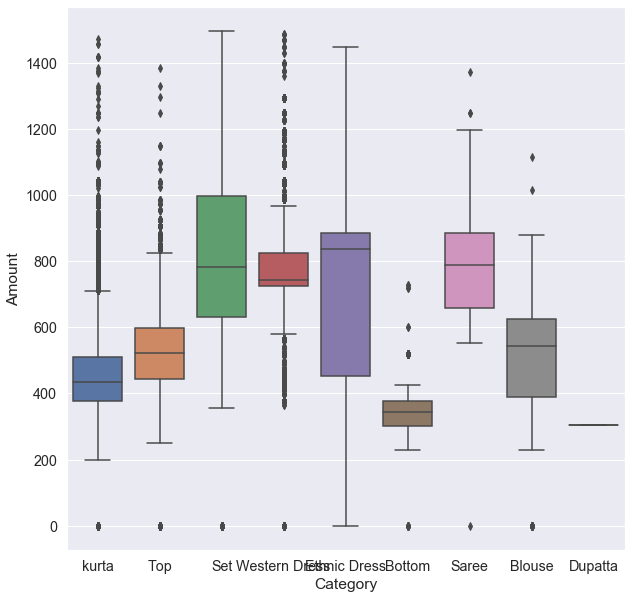

In [52]:
sns.boxplot(x="Category", y="Amount", data=sal)

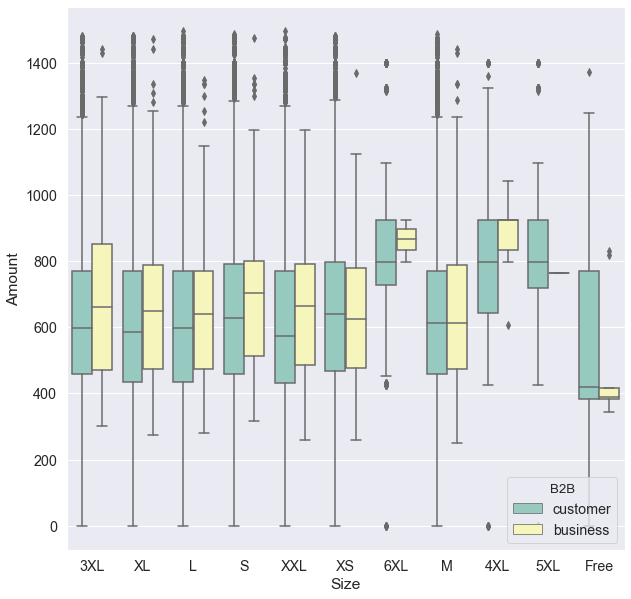

In [53]:
sns.boxplot(x="Size", y="Amount", hue="B2B", data=sal, palette='Set3')

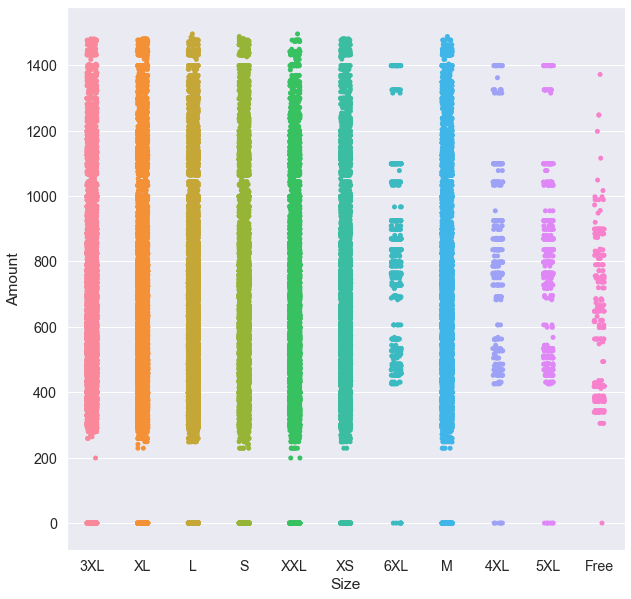

In [54]:
sns.stripplot(x="Size", y="Amount", data=sal)

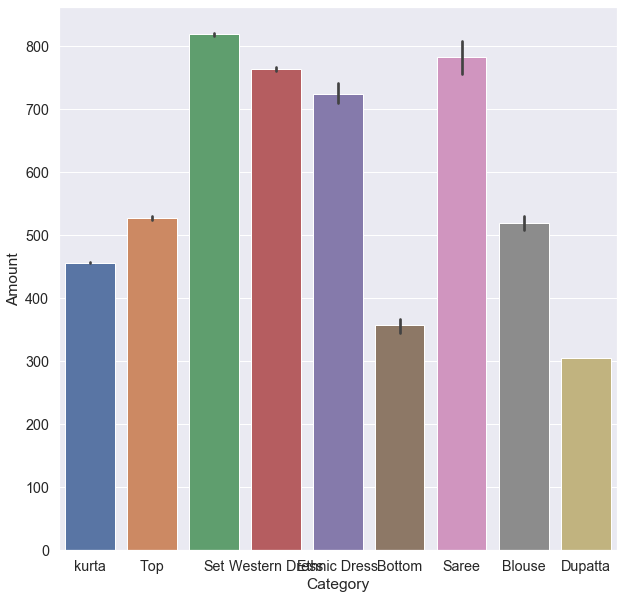

In [56]:
sns.barplot(x='Category', y='Amount', data=sal)

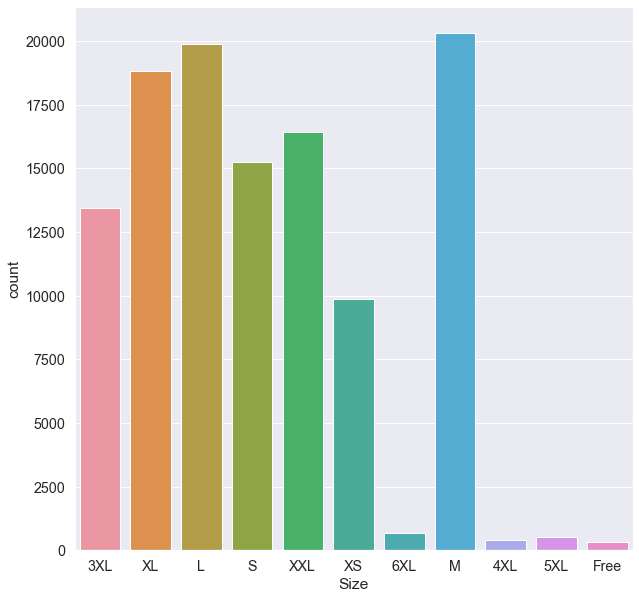

In [61]:
ax=sns.countplot(x='Size' ,data=sal)

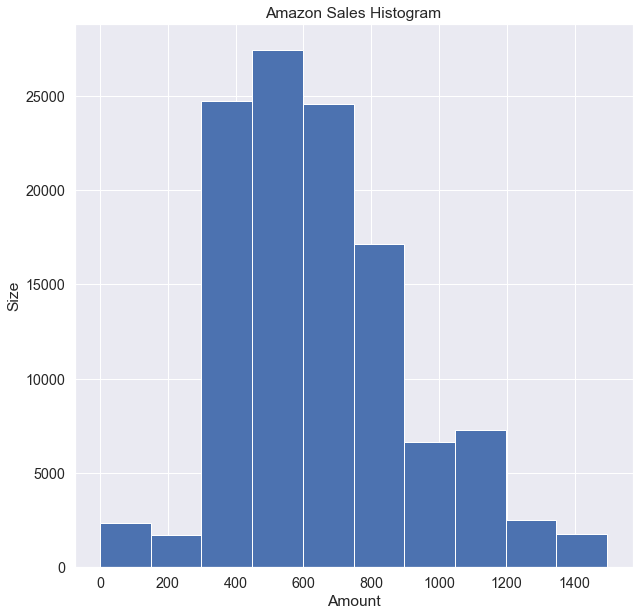

In [68]:
plt.hist(sal["Amount"])
plt.xlabel('Amount')
plt.ylabel('Size')
plt.title('Amazon Sales Histogram')
plt.show()

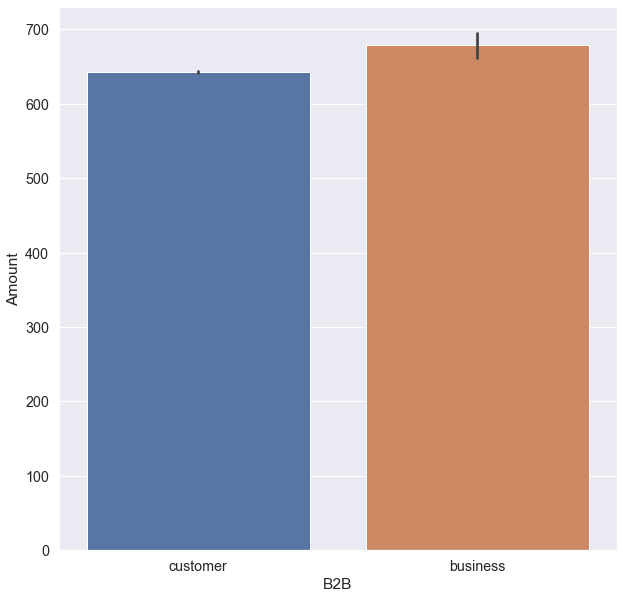

In [74]:
sns.barplot(x='B2B', y='Amount', data=sal)

In [75]:
sal.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)


,Size,Qty
6,M,20339.0
5,L,19895.0
8,XL,18836.0
10,XXL,16414.0
7,S,15256.0
0,3XL,13461.0
9,XS,9887.0
3,6XL,686.0
2,5XL,511.0
1,4XL,394.0


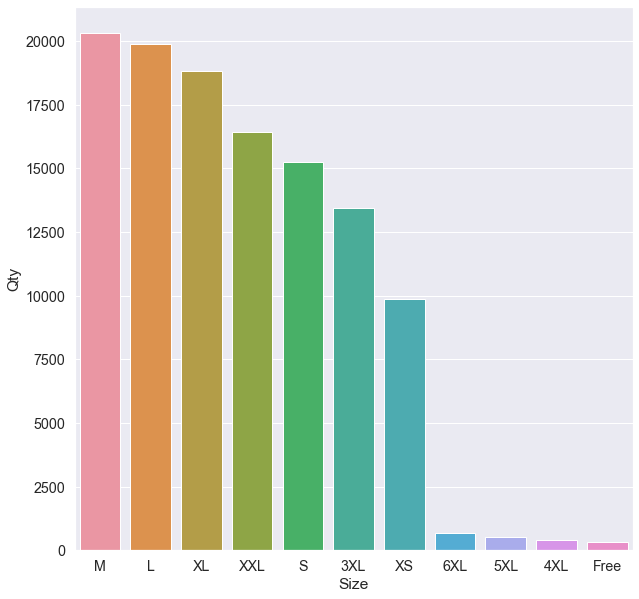

In [79]:
S_Qty=sal.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)

sns.barplot(x='Size',y='Qty', data=S_Qty)

##  Step 4: Predictive Modeling


In [87]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116016 entries, 48965 to 91802
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               116016 non-null  int64         
 1   Order ID            116016 non-null  object        
 2   Date                116016 non-null  datetime64[ns]
 3   Status              116016 non-null  object        
 4   Fulfilment          116016 non-null  object        
 5   Sales Channel       116016 non-null  object        
 6   ship-service-level  116016 non-null  object        
 7   Style               116016 non-null  object        
 8   SKU                 116016 non-null  object        
 9   Category            116016 non-null  object        
 10  Size                116016 non-null  object        
 11  ASIN                116016 non-null  object        
 12  Courier Status      116016 non-null  object        
 13  Qty                 116016

In [91]:
sal['Status'].value_counts()

Shipped                          77580
Shipped - Delivered to Buyer     28754
Cancelled                         5628
Shipped - Returned to Seller      1947
Shipped - Picked Up                973
Pending                            656
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: Status, dtype: int64

In [92]:
sal['Status'].unique()

array(['Shipped', 'Shipped - Delivered to Buyer', 'Cancelled',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Pending', 'Shipped - Picked Up', 'Shipped - Returning to Seller',
       'Shipped - Out for Delivery', 'Shipped - Lost in Transit',
       'Shipped - Damaged', 'Pending - Waiting for Pick Up'], dtype=object)

In [97]:
from sklearn.preprocessing import LabelEncoder


In [102]:
le = LabelEncoder()

In [107]:
sal['Status'] = le.fit_transform(sal['Status']) 

In [109]:
sal['Status'].unique()

array([ 3,  5,  0, 10,  9,  1,  8, 11,  7,  6,  4,  2])

In [124]:
sal['Status'].value_counts()

3     77580
5     28754
0      5628
10     1947
8       973
1       656
2       281
11      145
7        35
9        11
6         5
4         1
Name: Status, dtype: int64

In [108]:
sal.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,z_score
48965,48965,407-4203669-2723557,2022-03-31,3,Amazon,Amazon.in,Expedited,JNE3160,JNE3160-KR-G-L,kurta,...,1.0,INR,599.0,Lagola,WEST BENGAL,742148.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,customer,0.051965
48970,48970,404-1445673-1345134,2022-03-31,5,Merchant,Amazon.in,Standard,JNE3724,JNE3724-KR-L,kurta,...,1.0,INR,495.0,KOLKATA,WEST BENGAL,700124.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,customer,0.051965
48994,48994,407-2382032-1283569,2022-03-31,3,Amazon,Amazon.in,Expedited,JNE3546,JNE3546-KR-M,kurta,...,1.0,INR,481.0,CHIKODI,KARNATAKA,591201.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,customer,0.051965
48995,48995,405-8230962-2604350,2022-03-31,3,Amazon,Amazon.in,Expedited,JNE3160,JNE3160-KR-G-XL,kurta,...,1.0,INR,599.0,BENGALURU,KARNATAKA,560016.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,customer,0.051965
48996,48996,402-0339394-3540335,2022-03-31,3,Amazon,Amazon.in,Expedited,SET339,SET339-KR-NP-XL,Set,...,1.0,INR,688.0,GHAZIABAD,UTTAR PRADESH,201005.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,customer,0.051965


In [110]:
from sklearn.model_selection import train_test_split


In [111]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116016 entries, 48965 to 91802
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               116016 non-null  int64         
 1   Order ID            116016 non-null  object        
 2   Date                116016 non-null  datetime64[ns]
 3   Status              116016 non-null  int32         
 4   Fulfilment          116016 non-null  object        
 5   Sales Channel       116016 non-null  object        
 6   ship-service-level  116016 non-null  object        
 7   Style               116016 non-null  object        
 8   SKU                 116016 non-null  object        
 9   Category            116016 non-null  object        
 10  Size                116016 non-null  object        
 11  ASIN                116016 non-null  object        
 12  Courier Status      116016 non-null  object        
 13  Qty                 116016

In [ ]:
sal['Size'] = le.fit_transform(sal['Size']) 

In [219]:
sal['Size'].unique()

array([ 5,  6,  8,  9,  0, 10,  7,  3,  2,  4,  1])

In [221]:
sal['Courier Status'] = le.fit_transform(sal['Courier Status']) 

In [224]:
sal['Courier Status'].unique()

array([0, 1])

In [225]:
sal['B2B'] = le.fit_transform(sal['B2B']) 

In [228]:
sal['B2B'].unique()

array([1, 0])

In [229]:
sal['Category'] = le.fit_transform(sal['Category']) 

In [230]:
sal['Courier Status'].unique()

array([0, 1])

In [231]:
sal['Category'] = le.fit_transform(sal['Category']) 

In [232]:
sal['Category'].unique()

array([8, 5, 6, 7, 3, 0, 1, 4, 2], dtype=int64)

In [237]:
sal['ship-service-level'] = le.fit_transform(sal['ship-service-level']) 

In [245]:
sal['ship-service-level'].unique()

array([0, 1], dtype=int64)

In [247]:
x = sal [["ship-postal-code","Size","Courier Status","B2B","Category","ship-service-level"]]
y = sal["Status"]

In [248]:
x.head()

,ship-postal-code,Size,Courier Status,B2B,Category,ship-service-level
48965,742148.0,5,0,1,8,0
48970,700124.0,5,0,1,8,1
48994,591201.0,6,0,1,8,0
48995,560016.0,8,0,1,8,0
48996,201005.0,8,0,1,5,0


In [249]:
y

48965    3
48970    5
48994    3
48995    3
48996    3
        ..
91613    1
91511    1
91628    3
91618    1
91802    3
Name: Status, Length: 116016, dtype: int32

In [250]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=90)

In [251]:
x_train.head()

,ship-postal-code,Size,Courier Status,B2B,Category,ship-service-level
63934,560003.0,8,0,1,8,0
123931,700110.0,8,0,1,8,0
7318,623526.0,5,0,1,8,1
80143,560090.0,0,0,1,5,0
27500,226017.0,9,0,1,5,0


In [252]:
x_test.head()

,ship-postal-code,Size,Courier Status,B2B,Category,ship-service-level
35007,509301.0,10,0,1,5,1
109707,500072.0,8,0,1,8,0
29890,507111.0,10,0,1,8,1
63113,400703.0,6,0,1,7,1
70398,201306.0,8,0,1,8,1


In [253]:
y_train.head()

63934     3
123931    3
7318      5
80143     3
27500     3
Name: Status, dtype: int32

In [254]:
y_test.head()

35007     5
109707    3
29890     5
63113     5
70398     5
Name: Status, dtype: int32

In [255]:
# Train Model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [256]:
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Evaluate Model

In [257]:
y_pred = model.predict(x_test)
y_pred

array([5, 3, 5, ..., 5, 8, 5])

In [258]:
y_test

35007     5
109707    3
29890     5
63113     5
70398     5
         ..
105440    3
23402     3
80380     5
74612     5
75690     5
Name: Status, Length: 23204, dtype: int32

In [259]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [268]:
cm =confusion_matrix(y_test, y_pred)
cm

array([[ 1046,    62,     1,     0,     0,     0,     0,     0,     0,
            0,     0],
       [   69,    43,    20,     2,     0,     0,     0,     0,     0,
            0,     0],
       [    0,    19,    34,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    0,     0,     0, 15410,   155,     0,     0,     4,     0,
            8,     0],
       [    0,     0,     0,   179,  5090,     0,     7,   137,     1,
          271,    19],
       [    0,     0,     0,     0,     2,     0,     0,     0,     0,
            0,     0],
       [    0,     0,     0,     0,     4,     0,     1,     0,     0,
            0,     0],
       [    0,     0,     0,     2,   165,     0,     0,    11,     0,
           11,     4],
       [    0,     0,     0,     0,     2,     0,     0,     1,     0,
            0,     0],
       [    0,     0,     0,    18,   332,     0,     0,     7,     0,
           35,     1],
       [    0,     0,     0,     1,    28,     0,     0,    

In [264]:
acc = accuracy_score(y_test, y_pred) *100

In [265]:
print("accuracy = ",acc)

accuracy =  93.38907084985347


In [269]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1109
           1       0.35      0.32      0.33       134
           2       0.62      0.64      0.63        53
           3       0.99      0.99      0.99     15577
           5       0.88      0.89      0.89      5704
           6       0.00      0.00      0.00         2
           7       0.12      0.20      0.15         5
           8       0.07      0.06      0.06       193
           9       0.00      0.00      0.00         3
          10       0.11      0.09      0.10       393
          11       0.00      0.00      0.00        31

    accuracy                           0.93     23204
   macro avg       0.37      0.38      0.37     23204
weighted avg       0.93      0.93      0.93     23204



G:\anacoda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### cross_validate

In [275]:
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score

In [277]:
dtc = DecisionTreeClassifier(random_state=42)

In [280]:
cv_results_dtc = cross_validate(dtc, x, y, cv=10, return_train_score=True, n_jobs=-1)
cv_results_dtc

G:\anacoda\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


{'fit_time': array([1.97012734, 2.02850151, 1.80352592, 1.88823819, 1.9724021 ,
        1.97863245, 1.90063334, 1.99758148, 0.45283604, 0.38705134]),
 'score_time': array([0.00996399, 0.01124787, 0.03689694, 0.01695347, 0.01396418,
        0.01595736, 0.0129652 , 0.01017118, 0.00898767, 0.00701737]),
 'test_score': array([0.9296673 , 0.93466644, 0.93173591, 0.92932253, 0.92923634,
        0.93009826, 0.9362124 , 0.93190242, 0.93043703, 0.92776485]),
 'train_score': array([0.98581608, 0.98569157, 0.98604593, 0.9862279 , 0.98600762,
        0.98611297, 0.98605564, 0.98579706, 0.98610353, 0.98629507])}

In [281]:
cv_results_dtc['train_score'].mean()

0.9860153386985415

In [282]:
cv_results_dtc['test_score'].mean()

0.9311043468082817

In [284]:
cross_val_score(dtc, x, y, cv=10, n_jobs=-1)

G:\anacoda\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


array([0.9296673 , 0.93466644, 0.93173591, 0.92932253, 0.92923634,
       0.93009826, 0.9362124 , 0.93190242, 0.93043703, 0.92776485])

In [285]:
cross_val_score(dtc, x, y, cv=10, n_jobs=-1).mean()

G:\anacoda\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.9311043468082817

In [286]:
y_pred = cross_val_predict(dtc, x, y, cv=10, n_jobs=-1)
y_pred

G:\anacoda\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


array([ 3, 10,  3, ...,  3,  0,  3])

In [288]:
accuracy_score(y, y_pred)*100

93.1104330437181

##  Step 5: Dashboard Development


In [289]:
sal.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,z_score
48965,48965,407-4203669-2723557,2022-03-31,3,Amazon,Amazon.in,0,JNE3160,JNE3160-KR-G-L,8,...,1.0,INR,599.0,Lagola,WEST BENGAL,742148.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,1,0.051965
48970,48970,404-1445673-1345134,2022-03-31,5,Merchant,Amazon.in,1,JNE3724,JNE3724-KR-L,8,...,1.0,INR,495.0,KOLKATA,WEST BENGAL,700124.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,1,0.051965
48994,48994,407-2382032-1283569,2022-03-31,3,Amazon,Amazon.in,0,JNE3546,JNE3546-KR-M,8,...,1.0,INR,481.0,CHIKODI,KARNATAKA,591201.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,1,0.051965
48995,48995,405-8230962-2604350,2022-03-31,3,Amazon,Amazon.in,0,JNE3160,JNE3160-KR-G-XL,8,...,1.0,INR,599.0,BENGALURU,KARNATAKA,560016.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,1,0.051965
48996,48996,402-0339394-3540335,2022-03-31,3,Amazon,Amazon.in,0,SET339,SET339-KR-NP-XL,5,...,1.0,INR,688.0,GHAZIABAD,UTTAR PRADESH,201005.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,1,0.051965


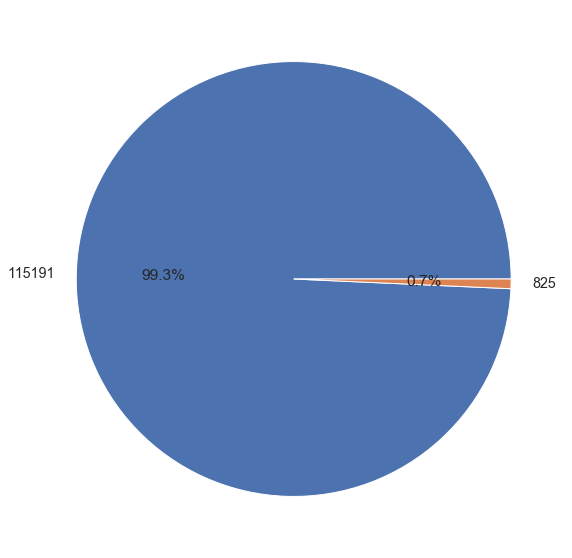

In [290]:
# Checking B2B Data  by using pie chart 
B2B_Check = sal['B2B'].value_counts()
plt.pie(B2B_Check, labels=B2B_Check, autopct='%1.1f%%')

plt.show()

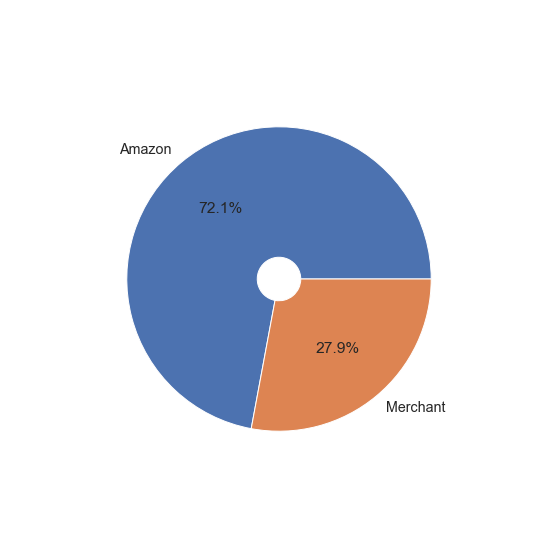

In [298]:
#  Prepare data for pie chart
a1 = sal['Fulfilment'].value_counts()
fig, ax = plt.subplots()
ax.pie(a1, labels=a1.index, autopct='%1.1f%%', radius=0.7, wedgeprops=dict(width=0.6))
ax.set(aspect="equal")

plt.show()

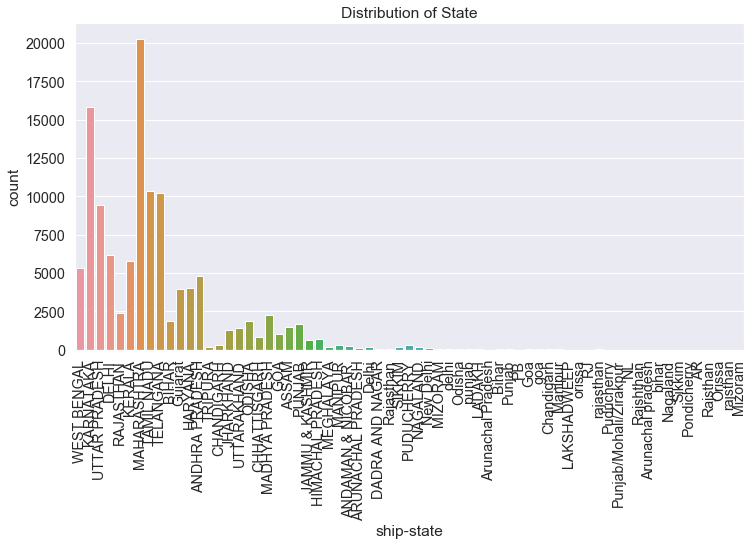

In [303]:
# Plot count of cities by state
plt.figure(figsize=(12, 6))
sns.countplot(data=sal, x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State')
plt.xticks(rotation=90)
plt.show()


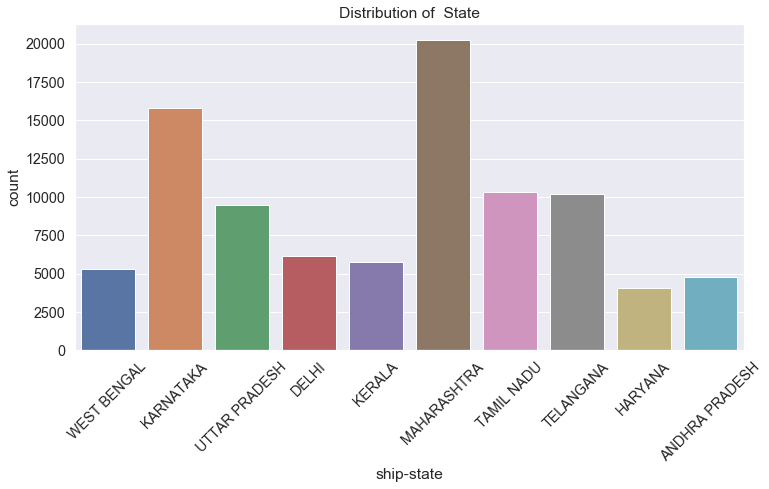

In [306]:
# top_10_States 
top_10_state = sal['ship-state'].value_counts().head(10)
# Plot count of cities by state
plt.figure(figsize=(12, 6))
sns.countplot(data=sal[sal['ship-state'].isin(top_10_state.index)], x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of  State')
plt.xticks(rotation=45)
plt.show()

([<matplotlib.patches.Wedge at 0x1878a28a1c8>,
 [Text(1.664959630625677, 1.07159200649632, 'MAHARASHTRA'),
  Text(-0.03937390017929819, 1.979608470376067, 'KARNATAKA'),
  Text(-1.3621147746894642, 1.4370258663547677, 'TAMIL NADU'),
  Text(-1.9267785735867309, 0.4559872019772966, 'TELANGANA'),
  Text(-1.8779351457187283, -0.6275026601333094, 'UTTAR PRADESH'),
  Text(-1.4314810562837197, -1.3679407828926098, 'DELHI'),
  Text(-0.8991249870134288, -1.7640788694749738, 'KERALA'),
  Text(-0.3123601537530921, -1.9552061615971206, 'WEST BENGAL'),
  Text(0.24955630152205446, -1.9642101853851166, 'ANDHRA PRADESH'),
  Text(0.7264765361229877, -1.8419098355953112, 'HARYANA'),
  Text(1.120843799849237, -1.632209905722767, 'Gujarat'),
  Text(1.3930041261358506, -1.4071032316672776, 'RAJASTHAN'),
  Text(1.564017362977914, -1.214186842419079, 'MADHYA PRADESH'),
  Text(1.6948680519720598, -1.0236319096259339, 'ODISHA'),
  Text(1.792834981115621, -0.8403229917645668, 'BIHAR'),
  Text(1.867436360899112, 

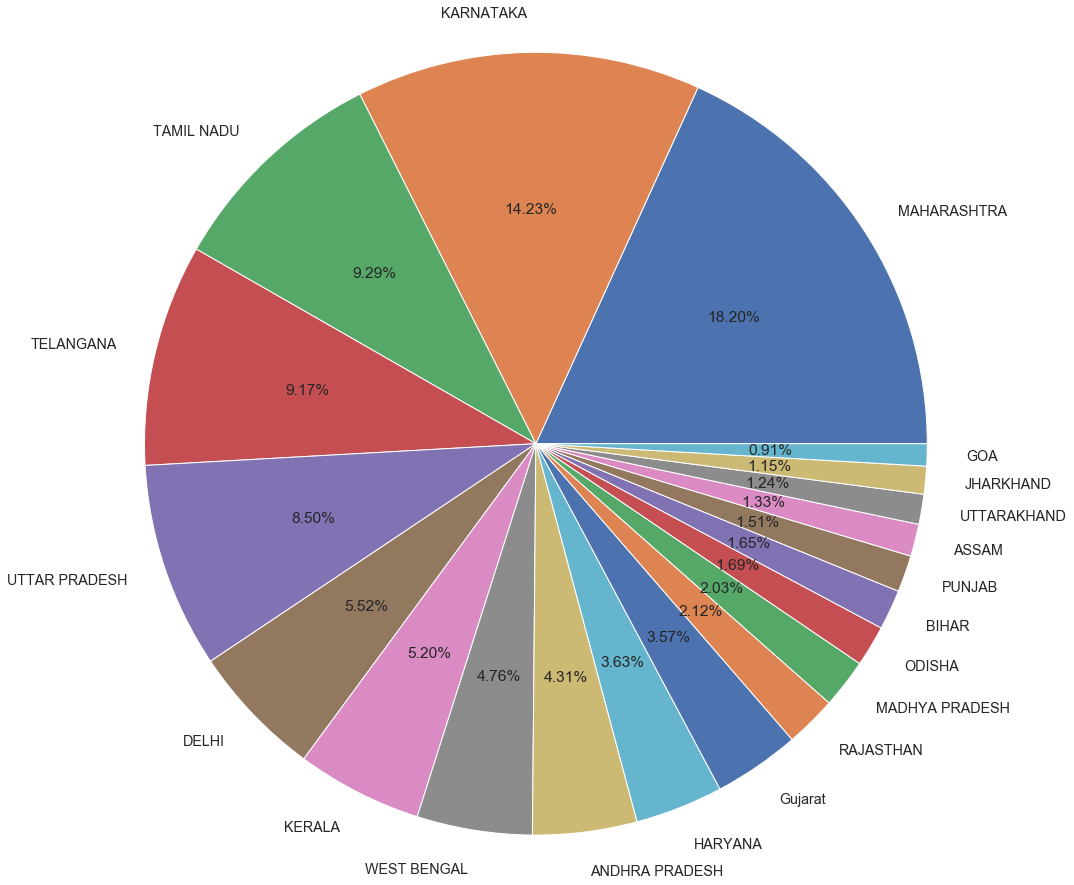

In [311]:
names = sal["ship-state"].value_counts().index
value = sal["ship-state"].value_counts().values
plt.pie(value[:20],labels=names[:20],autopct='%1.2f%%',radius=1.8)

([<matplotlib.patches.Wedge at 0x187821ef188>,
 [Text(1.68721258638461, 1.0362015674304665, '6'),
  Text(-0.13741534674739264, 1.9752258155659808, '5'),
  Text(-1.7806888514640988, 0.865763948355133, '8'),
  Text(-1.7357212525538577, -0.9527180765750526, '10'),
  Text(-0.415104936290008, -1.9359979059564267, '7'),
  Text(1.062481122780604, -1.670788395858335, '0'),
  Text(1.844467230247861, -0.7199587741959846, '9'),
  Text(1.972709602615644, -0.1697551876910656, '3'),
  Text(1.9771747925080776, -0.10573476188388127, '2'),
  Text(1.9791720349763222, -0.0572543095992244, '1'),
  Text(1.9799175562412443, -0.018068494339579303, '4')],
 [Text(0.9202977743916054, 0.5652008549620727, '17.53%'),
  Text(-0.0749538254985778, 1.077395899399626, '17.15%'),
  Text(-0.9712848280713267, 0.47223488092098165, '16.24%'),
  Text(-0.9467570468475587, -0.5196644054045741, '14.15%'),
  Text(-0.22642087434000435, -1.0559988577944146, '13.15%'),
  Text(0.5795351578803294, -0.9113391250136372, '11.60%'),
  Te

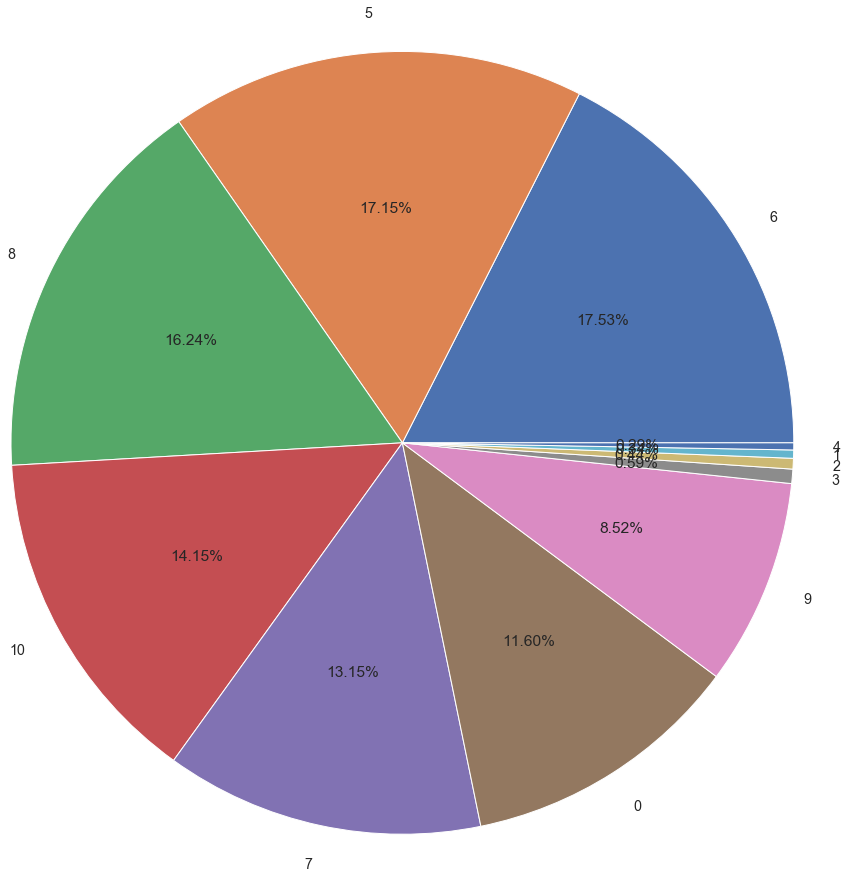

In [313]:
names = sal["Size"].value_counts().index
value = sal["Size"].value_counts().values
plt.pie(value[:20],labels=names[:20],autopct='%1.2f%%',radius=1.8)

In [325]:
sal2 = sal

In [326]:
sal2.to_csv('cleaned.csv',";")

In [327]:
sal2

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,z_score
48965,48965,407-4203669-2723557,2022-03-31,3,Amazon,Amazon.in,0,JNE3160,JNE3160-KR-G-L,8,...,1.0,INR,599.0,Lagola,WEST BENGAL,742148.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,1,0.051965
48970,48970,404-1445673-1345134,2022-03-31,5,Merchant,Amazon.in,1,JNE3724,JNE3724-KR-L,8,...,1.0,INR,495.0,KOLKATA,WEST BENGAL,700124.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,1,0.051965
48994,48994,407-2382032-1283569,2022-03-31,3,Amazon,Amazon.in,0,JNE3546,JNE3546-KR-M,8,...,1.0,INR,481.0,CHIKODI,KARNATAKA,591201.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,1,0.051965
48995,48995,405-8230962-2604350,2022-03-31,3,Amazon,Amazon.in,0,JNE3160,JNE3160-KR-G-XL,8,...,1.0,INR,599.0,BENGALURU,KARNATAKA,560016.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,1,0.051965
48996,48996,402-0339394-3540335,2022-03-31,3,Amazon,Amazon.in,0,SET339,SET339-KR-NP-XL,5,...,1.0,INR,688.0,GHAZIABAD,UTTAR PRADESH,201005.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,1,0.051965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91613,91613,406-3824357-5717901,2022-06-29,1,Amazon,Amazon.in,0,SET327,SET327-KR-DPT-XL,5,...,1.0,INR,999.0,KOZHIKODE,KERALA,673573.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,1,0.051965
91511,91511,407-8915211-4389169,2022-06-29,1,Merchant,Amazon.in,1,JNE3801,JNE3801-KR-XL,8,...,1.0,INR,725.0,Hyderabad,TELANGANA,500044.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,1,0.051965
91628,91628,407-8818117-2693907,2022-06-29,3,Amazon,Amazon.in,0,NW014,NW014-ST-SR-M,5,...,1.0,INR,537.0,BENGALURU,KARNATAKA,560066.0,IN,no promotion,1,0.051965
91618,91618,403-5452556-1815521,2022-06-29,1,Amazon,Amazon.in,0,JNE3761,JNE3761-KR-XL,8,...,1.0,INR,301.0,Loni,UTTAR PRADESH,201102.0,IN,no promotion,1,0.051965
